## Exploratory data analysis file pre-modelling

#### import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

#### read cleaned data frame

In [3]:
df = pd.read_feather('../data/processed/clean_heartfail')

In [4]:
df_features = df.copy()

In [5]:
df_features.drop(['hadm_id','endtime','seq_num',
                 'icd_code'],axis=1,inplace=True)

In [6]:
df_features

,time_on_vent,re_intub_class,gender,admission_type,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,...,std_pulseox,std_heartrate,creatinine,bun,lactic_acid,hemoglobin,wbg,tidalvolume,std_bloodpressure,pulseox
0,23.083333,0,F,EW EMER.,69,19.0,100.0,8.602325,167.2,142.0,...,0.000000,6.592926,1.7,15.0,2.1,7.2,23.3,553.0,13.680887,100.0
1,23.083333,0,F,EW EMER.,69,19.0,100.0,8.602325,167.2,142.0,...,0.000000,6.592926,1.7,15.0,2.1,7.2,23.3,553.0,13.680887,100.0
2,258.800000,1,M,EW EMER.,53,20.0,116.0,2.469818,171.6,143.0,...,0.866025,6.946222,0.6,13.0,1.3,8.3,13.4,411.0,8.964436,99.0
3,258.800000,1,M,EW EMER.,53,20.0,116.0,2.469818,171.6,143.0,...,0.866025,6.946222,0.6,13.0,1.3,8.3,13.4,411.0,8.964436,99.0
4,38.116667,0,M,DIRECT EMER.,46,15.0,88.0,5.398412,261.8,139.0,...,0.547723,3.250641,3.0,41.0,1.4,9.9,12.7,594.0,2.786874,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,168.433333,0,F,URGENT,84,10.0,121.0,10.079471,190.1,139.0,...,1.476183,8.248185,1.2,39.0,1.3,9.0,26.4,370.0,11.393143,96.0
4036,125.016667,0,F,URGENT,77,15.0,88.0,5.724418,152.2,144.0,...,1.542129,3.501067,1.4,54.0,1.1,8.1,15.2,357.0,6.534524,99.0
4037,19.766667,0,M,EW EMER.,91,27.0,103.0,6.090135,206.4,141.0,...,2.263846,27.635381,1.0,19.0,1.4,9.7,65.0,386.0,4.661902,99.0
4038,32.866667,0,M,DIRECT EMER.,62,20.5,80.0,4.915052,187.0,134.0,...,0.052852,5.804789,5.4,50.0,1.2,8.1,7.2,913.0,7.898702,100.0


In [7]:
from scipy.stats import shapiro, normaltest

In [8]:
df_continuous = df_features.copy()

In [9]:
df_continuous.drop(['gender','admission_type','re_intub_class'],axis=1, inplace=True)

In [10]:
df_continuous.apply(normaltest)

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,std_pulseox,std_heartrate,creatinine,bun,lactic_acid,hemoglobin,wbg,tidalvolume,std_bloodpressure,pulseox
0,4034.816935,2.250862e+02,1.038772e+02,3.003043e+02,10089.141198,1.351175e+03,2.933007e+01,2574.312433,2.074040e+02,4.498534e+02,...,5435.917349,2365.555215,2166.351014,1.225394e+03,4975.802208,2.344247e+02,2855.087107,5.855302e+02,5036.623044,1.258934e+03
1,0.000000,1.327859e-49,2.775639e-23,6.162520e-66,0.000000,3.945434e-294,4.276178e-07,0.000000,9.178739e-46,2.068141e-98,...,0.000000,0.000000,0.000000,8.109769e-267,0.000000,1.245441e-51,0.000000,7.140727e-128,0.000000,4.226014e-274


In [11]:
df_continuous.apply(shapiro)

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,std_pulseox,std_heartrate,creatinine,bun,lactic_acid,hemoglobin,wbg,tidalvolume,std_bloodpressure,pulseox
0,0.583838,9.723157e-01,9.897270e-01,9.775791e-01,0.350059,9.062346e-01,9.924039e-01,0.792707,9.873408e-01,9.558071e-01,...,0.674961,0.824419,0.730573,0.84927,0.710515,9.748078e-01,0.822027,9.575788e-01,0.546959,0.852355
1,0.000000,2.776147e-27,1.512020e-16,9.276678e-25,0.000000,1.961818e-44,7.587142e-14,0.000000,1.431951e-18,2.404443e-33,...,0.000000,0.000000,0.000000,0.00000,0.000000,3.877604e-26,0.000000,8.647956e-33,0.000000,0.000000


#### importantly, no columns appear to be normally distributed using either normality test

<AxesSubplot:xlabel='pulseox', ylabel='Count'>

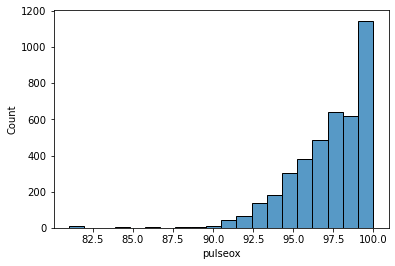

In [12]:
sns.histplot(df_features['pulseox'], bins = 20)

#### Remove outliers by removing all values with a zscore +/- 4

In [13]:
summary_stats = df_continuous.describe()

In [14]:
summary_stats

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,std_pulseox,std_heartrate,creatinine,bun,lactic_acid,hemoglobin,wbg,tidalvolume,std_bloodpressure,pulseox
count,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,...,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000
mean,81.752537,68.700743,19.856889,85.546535,4.587777,189.510619,138.830693,119.114109,7.405604,25.365842,...,1.186367,5.656671,1.626436,33.426980,1.482171,9.910322,12.438193,467.212518,8.641372,97.562376
std,119.412982,13.320596,5.687389,16.608234,4.640168,60.190577,4.731454,48.009584,0.060947,5.246376,...,1.140069,4.420775,1.337389,23.046464,0.789826,1.678938,6.382110,139.071011,7.538883,2.488711
min,6.033333,19.000000,0.000000,0.000000,0.000000,69.700000,119.000000,25.000000,6.920000,10.000000,...,0.000000,0.000000,0.000000,4.000000,0.400000,0.000000,0.100000,101.000000,0.000000,81.000000
25%,17.833333,60.000000,16.000000,74.000000,2.540580,149.600000,136.000000,89.000000,7.370000,22.000000,...,0.534522,2.875181,0.800000,17.000000,1.000000,8.700000,8.400000,372.000000,4.947220,96.000000
50%,40.725000,70.000000,20.000000,84.000000,3.913066,179.300000,139.000000,110.000000,7.410000,24.000000,...,0.983192,4.622409,1.200000,26.000000,1.300000,9.750000,11.300000,450.000000,7.210483,98.000000
75%,96.583333,79.000000,23.000000,96.000000,6.122266,218.900000,142.000000,137.000000,7.450000,28.000000,...,1.581139,7.312090,1.900000,43.000000,1.800000,10.900000,14.900000,537.000000,10.279776,100.000000
max,2112.833333,91.000000,50.000000,173.000000,179.679212,605.000000,158.000000,510.000000,7.620000,50.000000,...,26.640051,57.982756,10.600000,176.000000,18.300000,16.600000,103.200000,1300.000000,115.380117,100.000000


In [15]:
df_continuous

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,std_pulseox,std_heartrate,creatinine,bun,lactic_acid,hemoglobin,wbg,tidalvolume,std_bloodpressure,pulseox
0,23.083333,69,19.0,100.0,8.602325,167.2,142.0,183.0,7.51,27.0,...,0.000000,6.592926,1.7,15.0,2.1,7.2,23.3,553.0,13.680887,100.0
1,23.083333,69,19.0,100.0,8.602325,167.2,142.0,183.0,7.51,27.0,...,0.000000,6.592926,1.7,15.0,2.1,7.2,23.3,553.0,13.680887,100.0
2,258.800000,53,20.0,116.0,2.469818,171.6,143.0,90.0,7.40,50.0,...,0.866025,6.946222,0.6,13.0,1.3,8.3,13.4,411.0,8.964436,99.0
3,258.800000,53,20.0,116.0,2.469818,171.6,143.0,90.0,7.40,50.0,...,0.866025,6.946222,0.6,13.0,1.3,8.3,13.4,411.0,8.964436,99.0
4,38.116667,46,15.0,88.0,5.398412,261.8,139.0,111.0,7.47,28.0,...,0.547723,3.250641,3.0,41.0,1.4,9.9,12.7,594.0,2.786874,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,168.433333,84,10.0,121.0,10.079471,190.1,139.0,119.0,7.34,20.0,...,1.476183,8.248185,1.2,39.0,1.3,9.0,26.4,370.0,11.393143,96.0
4036,125.016667,77,15.0,88.0,5.724418,152.2,144.0,216.0,7.26,29.0,...,1.542129,3.501067,1.4,54.0,1.1,8.1,15.2,357.0,6.534524,99.0
4037,19.766667,91,27.0,103.0,6.090135,206.4,141.0,141.0,7.33,18.0,...,2.263846,27.635381,1.0,19.0,1.4,9.7,65.0,386.0,4.661902,99.0
4038,32.866667,62,20.5,80.0,4.915052,187.0,134.0,122.0,7.41,25.0,...,0.052852,5.804789,5.4,50.0,1.2,8.1,7.2,913.0,7.898702,100.0


In [16]:
cols = list(df_continuous.columns)
df_new = df_continuous.copy()
for col in cols:
    df_new[col] = (df_continuous[col]-df_continuous[col].mean())/df_continuous[col].std()

In [17]:
for col in cols:
    df_continuous[col] = np.where(((df_continuous[col]-df_continuous[col].mean())/df_continuous[col].std()>4)|
                                  ((df_continuous[col]-df_continuous[col].mean())/df_continuous[col].std()<-4),
                                  np.NaN,df_continuous[col])

In [18]:
df_continuous.isnull().sum()

time_on_vent         46
anchor_age            0
spontrr               2
heartrate            10
std_spontrr           2
weight               27
sodium                5
abg_po2              49
abg_ph                8
hco3                  5
abg_pco2             20
bloodpressure         9
std_pulseox          23
std_heartrate        31
creatinine           43
bun                  13
lactic_acid          15
hemoglobin            2
wbg                  27
tidalvolume           5
std_bloodpressure    28
pulseox              14
dtype: int64

In [19]:
df_continuous['tidal_weight'] = df_continuous['tidalvolume']/ df_continuous['weight']

In [20]:
# weight in lb x 703/ height in inches2
#df_continuous['bmi'] = (df_continuous['weight']*703)/ df_continuous['height']**2

In [21]:
df_continuous

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,std_heartrate,creatinine,bun,lactic_acid,hemoglobin,wbg,tidalvolume,std_bloodpressure,pulseox,tidal_weight
0,23.083333,69.0,19.0,100.0,8.602325,167.2,142.0,183.0,7.51,27.0,...,6.592926,1.7,15.0,2.1,7.2,23.3,553.0,13.680887,100.0,3.307416
1,23.083333,69.0,19.0,100.0,8.602325,167.2,142.0,183.0,7.51,27.0,...,6.592926,1.7,15.0,2.1,7.2,23.3,553.0,13.680887,100.0,3.307416
2,258.800000,53.0,20.0,116.0,2.469818,171.6,143.0,90.0,7.40,NaN,...,6.946222,0.6,13.0,1.3,8.3,13.4,411.0,8.964436,99.0,2.395105
3,258.800000,53.0,20.0,116.0,2.469818,171.6,143.0,90.0,7.40,NaN,...,6.946222,0.6,13.0,1.3,8.3,13.4,411.0,8.964436,99.0,2.395105
4,38.116667,46.0,15.0,88.0,5.398412,261.8,139.0,111.0,7.47,28.0,...,3.250641,3.0,41.0,1.4,9.9,12.7,594.0,2.786874,97.0,2.268908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,168.433333,84.0,10.0,121.0,10.079471,190.1,139.0,119.0,7.34,20.0,...,8.248185,1.2,39.0,1.3,9.0,26.4,370.0,11.393143,96.0,1.946344
4036,125.016667,77.0,15.0,88.0,5.724418,152.2,144.0,216.0,7.26,29.0,...,3.501067,1.4,54.0,1.1,8.1,15.2,357.0,6.534524,99.0,2.345598
4037,19.766667,91.0,27.0,103.0,6.090135,206.4,141.0,141.0,7.33,18.0,...,NaN,1.0,19.0,1.4,9.7,NaN,386.0,4.661902,99.0,1.870155
4038,32.866667,62.0,20.5,80.0,4.915052,187.0,134.0,122.0,7.41,25.0,...,5.804789,5.4,50.0,1.2,8.1,7.2,913.0,7.898702,100.0,4.882353


In [22]:
df_continuous.dropna(inplace=True)

In [23]:
df_continuous.apply(normaltest)

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,std_heartrate,creatinine,bun,lactic_acid,hemoglobin,wbg,tidalvolume,std_bloodpressure,pulseox,tidal_weight
0,1693.707532,2.079963e+02,3.876235e+01,1.447090e+02,4.421919e+02,4.683777e+02,20.345681,7.970535e+02,8.886848,3.580676e+02,...,8.385417e+02,1571.259679,9.752136e+02,9.845254e+02,2.082070e+02,6.441748e+02,3.723562e+02,1465.223382,4.169627e+02,8.830228e+02
1,0.000000,6.826283e-46,3.827031e-09,3.774326e-32,9.533590e-97,1.963738e-102,0.000038,8.356506e-174,0.011756,1.764438e-78,...,8.184473e-183,0.000000,1.718145e-212,1.633185e-214,6.143477e-46,1.315876e-140,1.392762e-81,0.000000,2.868837e-91,1.794899e-192


In [24]:
df_continuous.apply(shapiro)

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,std_heartrate,creatinine,bun,lactic_acid,hemoglobin,wbg,tidalvolume,std_bloodpressure,pulseox,tidal_weight
0,0.732902,9.729753e-01,9.925807e-01,9.851661e-01,9.414274e-01,9.545260e-01,9.927452e-01,9.347935e-01,9.961267e-01,9.574049e-01,...,9.100650e-01,0.772607,0.854992,0.88446,9.776378e-01,9.400534e-01,9.664013e-01,0.86883,0.885037,9.402530e-01
1,0.000000,6.722698e-26,6.290342e-13,2.809165e-19,5.556971e-36,1.722256e-32,9.572797e-13,1.616770e-37,3.156110e-08,1.281733e-31,...,2.534949e-42,0.000000,0.000000,0.00000,1.073536e-23,2.604293e-36,1.463892e-28,0.00000,0.000000,2.904810e-36


In [25]:
df_categorical = df_features.copy()
df_categorical = df_features[['re_intub_class','gender','admission_type']]

In [26]:
from scipy.stats import boxcox

In [27]:
df_tobox = df_continuous.copy()

In [28]:
df_tobox.drop('pulseox',axis=1,inplace=True)

In [29]:
from sklearn.preprocessing import quantile_transform

In [30]:
df_tobox = df_tobox.transform(lambda x: boxcox((x + 1),0))

In [31]:
pulseox = df_continuous['pulseox'].values
df_tobox['pulseox'] = quantile_transform(pulseox.reshape(-1,1),
                             n_quantiles=300,
                             output_distribution='normal',
                             copy=True)

In [32]:
df_model = pd.merge(left = df_tobox, right=df_categorical, how = 'inner',left_index = True, right_index = True)

In [33]:
#df_model = pd.concat([df_to_model,df_continuous['pulseox']],axis=1)

In [34]:
df_model

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,lactic_acid,hemoglobin,wbg,tidalvolume,std_bloodpressure,tidal_weight,pulseox,re_intub_class,gender,admission_type
0,3.181520,4.248495,2.995732,4.615121,2.262005,5.125154,4.962845,5.214936,2.141242,3.332205,...,1.131402,2.104134,3.190476,6.317165,2.686546,1.460338,5.199338,0,F,EW EMER.
1,3.181520,4.248495,2.995732,4.615121,2.262005,5.125154,4.962845,5.214936,2.141242,3.332205,...,1.131402,2.104134,3.190476,6.317165,2.686546,1.460338,5.199338,0,F,EW EMER.
4,3.666549,3.850148,2.772589,4.488636,1.856050,5.571393,4.941642,4.718499,2.136531,3.367296,...,0.875469,2.388763,2.617396,6.388561,1.331541,1.184456,-0.395725,0,M,DIRECT EMER.
5,4.868175,4.262680,3.218876,4.394449,1.167725,4.872139,4.927254,4.584967,2.145931,3.433987,...,0.875469,2.116256,2.595255,6.095825,1.741895,1.485735,-0.395725,0,M,EW EMER.
6,4.868175,4.262680,3.218876,4.394449,1.167725,4.872139,4.927254,4.584967,2.145931,3.433987,...,0.875469,2.116256,2.595255,6.095825,1.741895,1.485735,-0.395725,0,M,EW EMER.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,4.453378,4.204693,2.944439,4.276666,1.405311,5.619676,5.017280,4.290459,2.124654,3.637586,...,0.993252,2.341806,2.251292,6.011267,1.933442,0.908693,5.199338,0,M,EW EMER.
4035,5.132460,4.442651,2.397895,4.804021,2.405094,5.252797,4.941642,4.787492,2.121063,3.044522,...,0.832909,2.302585,3.310543,5.916202,2.517143,1.080565,-0.709103,0,F,URGENT
4036,4.836414,4.356709,2.772589,4.488636,1.905745,5.031744,4.976734,5.379897,2.111425,3.401197,...,0.741937,2.208274,2.785011,5.880533,2.019496,1.207645,0.373159,0,F,URGENT
4038,3.522431,4.143135,3.068053,4.394449,1.777500,5.236442,4.905275,4.812184,2.129421,3.258097,...,0.788457,2.208274,2.104134,6.817831,2.185905,1.771957,5.199338,0,M,DIRECT EMER.


In [35]:
#df_to_model['testing'],lmbda= boxcox((df_to_model['pulseox']+1))

<AxesSubplot:xlabel='pulseox', ylabel='Count'>

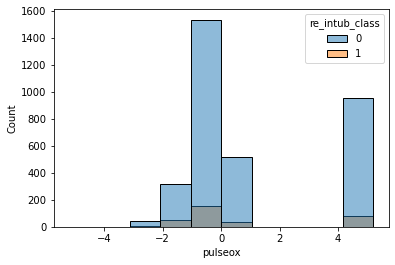

In [36]:
sns.histplot(df_model, x = 'pulseox', hue = 're_intub_class', bins = 10)

In [37]:
df_model.columns

Index(['time_on_vent', 'anchor_age', 'spontrr', 'heartrate', 'std_spontrr',
       'weight', 'sodium', 'abg_po2', 'abg_ph', 'hco3', 'abg_pco2',
       'bloodpressure', 'std_pulseox', 'std_heartrate', 'creatinine', 'bun',
       'lactic_acid', 'hemoglobin', 'wbg', 'tidalvolume', 'std_bloodpressure',
       'tidal_weight', 'pulseox', 're_intub_class', 'gender',
       'admission_type'],
      dtype='object')

In [38]:
#df_to_model['newpulse'] = df_to_model['pulseox']

In [39]:
#df_to_model.reset_index(inplace=True)
#df_to_model.drop('index',axis=1,inplace=True)

<AxesSubplot:>

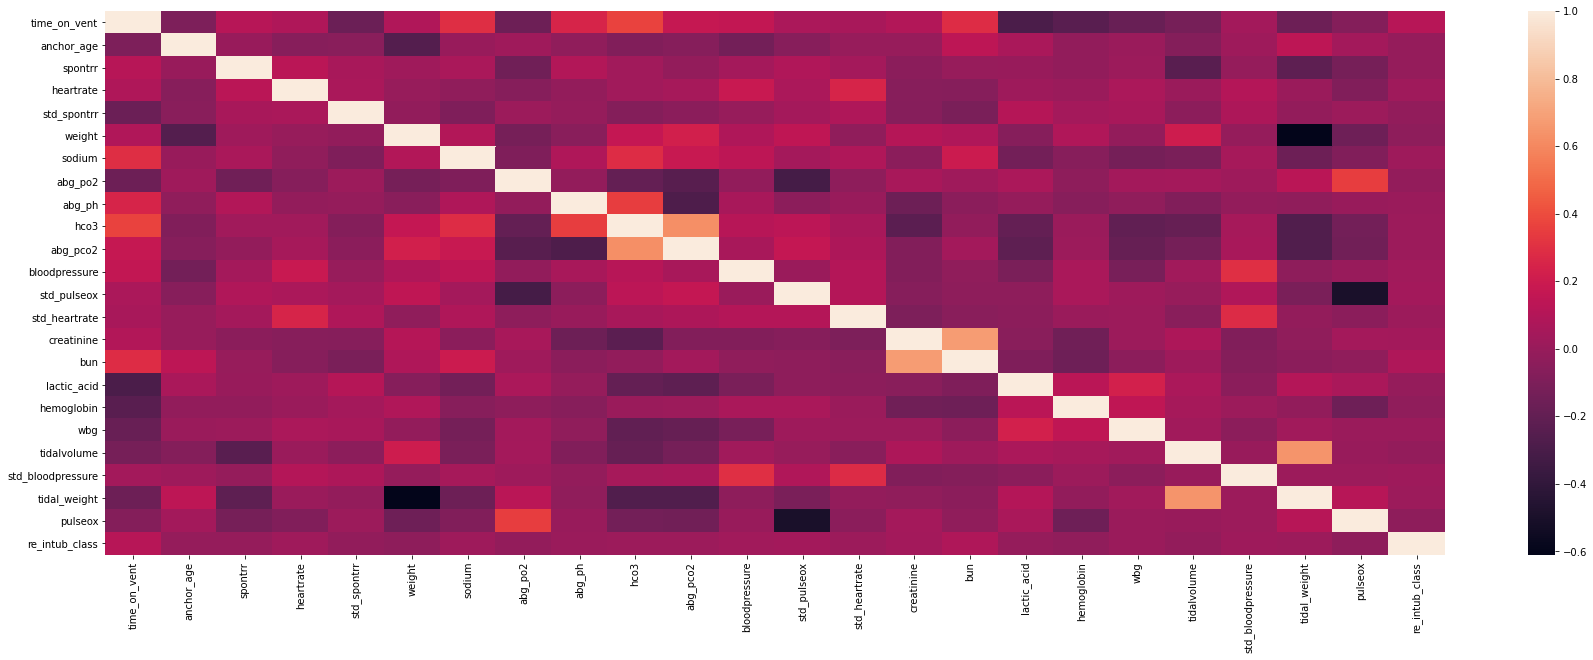

In [40]:
plt.figure(figsize = (30,10))
sns.heatmap(df_model.corr())

In [41]:
#df_to_model.drop(['tidalvolume','weight'],axis=1,inplace=True)

In [42]:
df_model.describe()

,time_on_vent,anchor_age,spontrr,heartrate,std_spontrr,weight,sodium,abg_po2,abg_ph,hco3,...,creatinine,bun,lactic_acid,hemoglobin,wbg,tidalvolume,std_bloodpressure,tidal_weight,pulseox,re_intub_class
count,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,...,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000
mean,3.754762,4.228223,2.993566,4.439872,1.599839,5.198299,4.939797,4.717883,2.128989,3.250315,...,0.858058,3.324685,0.871523,2.381257,2.504060,6.105072,2.099348,1.262169,1.118709,0.088625
std,1.043063,0.211573,0.324386,0.184998,0.458503,0.281992,0.033191,0.306155,0.007008,0.188808,...,0.362239,0.602386,0.238845,0.148146,0.414712,0.295773,0.472655,0.255290,2.618643,0.284240
min,1.950661,2.995732,0.000000,3.713572,0.000000,4.258446,4.804021,3.258097,2.100469,2.564949,...,0.000000,1.609438,0.336472,1.974081,0.095310,4.624973,0.000000,0.283887,-5.199338,0.000000
25%,2.924952,4.127134,2.833213,4.317488,1.261847,5.013298,4.919981,4.510860,2.124654,3.135494,...,0.587787,2.890372,0.693147,2.272126,2.251292,5.921578,1.781129,1.094036,-0.709103,0.000000
50%,3.703357,4.262680,3.044522,4.442651,1.590746,5.194622,4.941642,4.709530,2.129421,3.218876,...,0.741937,3.258097,0.832909,2.379546,2.509599,6.111467,2.094379,1.260478,-0.029346,0.000000
75%,4.553350,4.382027,3.178054,4.564348,1.958952,5.388158,4.962845,4.919981,2.134166,3.367296,...,1.029619,3.737670,1.029619,2.476538,2.766319,6.289716,2.414925,1.421153,5.199338,0.000000
max,6.315448,4.521789,3.737670,4.997212,3.132023,6.063785,5.062595,5.739793,2.154085,3.850148,...,2.066863,4.836282,1.722767,2.867899,3.660994,6.908755,3.662630,2.297199,5.199338,1.000000


In [43]:
#df_continuous.reset_index(inplace=True)
#df_continuous.drop('index',axis=1,inplace=True)

In [44]:
df_model.reset_index(inplace=True)
df_model.drop('index',axis=1,inplace=True)

In [45]:
df_model.to_feather('../data/processed/df_to_model_heartfail')